### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 2


### Дисциплина: Методы машинного обучения

##### Студент:  Петров Артем Евгеньевич
##### Группа:   НКНбд-01-21

## Москва 2024
***

Контрольная работа 2 – Вариант 10 

1. Набор данных: cherry_blossoms 

2. Независимая переменная: temp 

3. Зависимая переменная: temp_lower 

4. Доп. признак: имеющий минимальную корреляцию с независимой переменной 

5. Визуализация доп. признака – эмпирическая плотность распределения 

6. Показатель качества регрессии – MSE (mean squared error) 

7. Степень полинома: 3 

8. Параметры глубокой нейронной сети: кол-во скрытых слоев – 3, кол-во нейронов в скрытом слое – 128, функция активации – сигмоида. 

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик). Оставьте в наборе признаки, принимающие числовые значения.  
2. Удалите из набора точки с выбросами при помощи стандартизованной оценки (Z-score) таким образом, чтобы точки с выбросами составляли от 5% до 10% всех точек набора данных. Визуализируйте точки исходного набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), показывая оставленные в наборе точки и удаленные точки разными цветами, подписывая оси и рисунок и создавая легенду.  
3. Выполните стандартизацию независимого признака и масштабирование на интервал [-1, 1] зависимого признака. Решите задачи линейной регрессии и полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронных сетей с одним нейроном и оцените качество полученных моделей по показателю, указанному в индивидуальном задании. Отследите обучение нейронных сетей, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию.  
4. Постройте кривые обучения для построенных нейронных сетей с зависимостью от количества эпох на одной визуализации. На визуализации создайте легенду. 
5. Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линии линейной и полиномиальной регрессий (другими цветами), подписывая оси и рисунок и создавая легенду.  
6. Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании.  
7. Стандартизуйте этот признак и визуализируйте его в соответствии с индивидуальным заданием.  
8. Сформируйте набор входных данных из двух стандартизованных признаков набора данных (независимый признак и определенный признак), постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика. Отследите обучение нейронной сети, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию.  
9. Визуализируйте набор данных в виде диаграммы рассеяния и прогноз нейронной сети в виде поверхности в трехмерном пространстве, подписывая оси и рисунок. 
10. Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду. 

# Выполнение лабораторной работы:
# 1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик). Оставьте в наборе признаки, принимающие числовые значения.  

In [436]:
import pandas as pd

In [437]:
df = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/cherry_blossoms.csv', sep = ';')

In [438]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1215 non-null   int64  
 1   doy         827 non-null    float64
 2   temp        1124 non-null   float64
 3   temp_upper  1124 non-null   float64
 4   temp_lower  1124 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 47.6 KB
None


,year,doy,temp,temp_upper,temp_lower
0,801,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN


In [439]:
def columns_with_missing_data(df):
    for column in df.columns[df.isnull().any()]:
        print(f"{column:<20}\t{df[column].isnull().mean():.2f}")

print(columns_with_missing_data(df))

doy                 	0.32
temp                	0.07
temp_upper          	0.07
temp_lower          	0.07
None


In [440]:
df.isna().sum()

year            0
doy           388
temp           91
temp_upper     91
temp_lower     91
dtype: int64

In [441]:
df = df.dropna()
display(df)

,year,doy,temp,temp_upper,temp_lower
50,851,108.0,7.38,12.10,2.66
63,864,100.0,6.42,8.69,4.14
65,866,106.0,6.44,8.11,4.77
88,889,104.0,6.83,8.48,5.19
90,891,109.0,6.98,8.96,5.00
...,...,...,...,...,...
1175,1976,99.0,8.20,8.77,7.63
1176,1977,93.0,8.22,8.78,7.66
1177,1978,104.0,8.20,8.78,7.61
1178,1979,97.0,8.28,8.83,7.73


# 2. Удалите из набора точки с выбросами при помощи стандартизованной оценки (Z-score) таким образом, чтобы точки с выбросами составляли от 5% до 10% всех точек набора данных. Визуализируйте точки исходного набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), показывая оставленные в наборе точки и удаленные точки разными цветами, подписывая оси и рисунок и создавая легенду.  

In [442]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'scatter canvas for dataset values of temp by x and temp_lower by y')

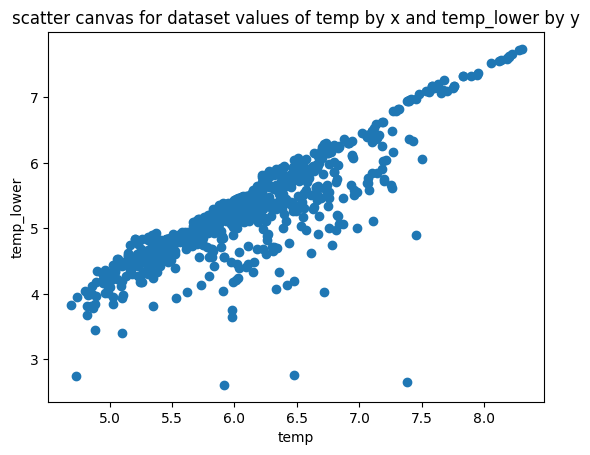

In [443]:
plt.scatter(df['temp'], df['temp_lower'])
plt.xlabel('temp')
plt.ylabel('temp_lower')
plt.title('scatter canvas for dataset values of temp by x and temp_lower by y')

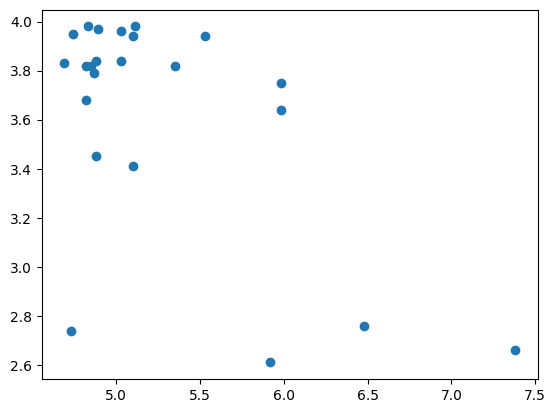

In [444]:
discarded_df = df[(df['temp_lower'] < 4) & (df['temp'] > 4.5)]
discarded_df.head()
plt.scatter(discarded_df['temp'], discarded_df['temp_lower'])

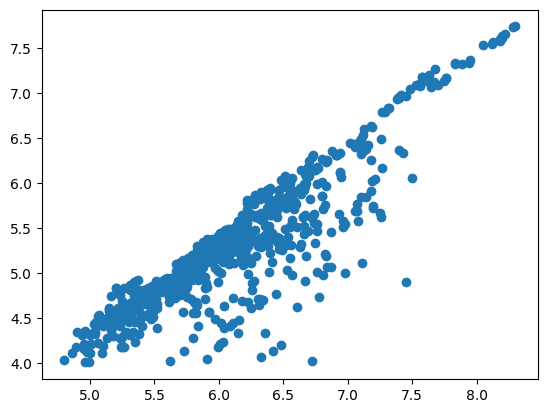

In [445]:
data = df[(df['temp_lower'] > 4)] 
data.head()
plt.scatter(data['temp'], data['temp_lower'])

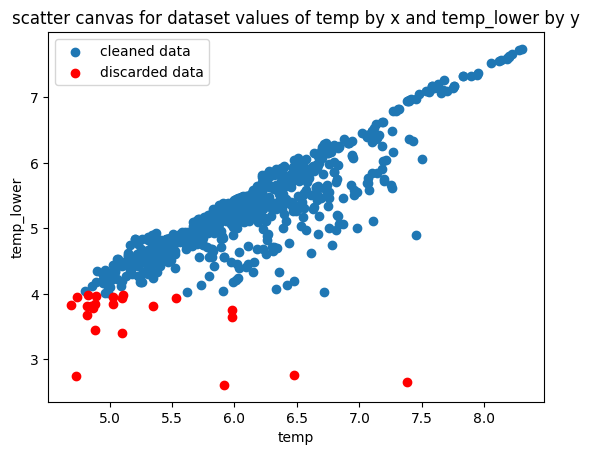

In [446]:
plt.scatter(data['temp'], data['temp_lower'], label = 'cleaned data')
plt.scatter(discarded_df['temp'], discarded_df['temp_lower'], c='r', label='discarded data')
plt.xlabel('temp')
plt.ylabel('temp_lower')
plt.title('scatter canvas for dataset values of temp by x and temp_lower by y')
plt.legend()

In [447]:
def z_score(df):
    # cols = list(df.columns)
    tmp = df.copy()
    tmp['z_temp_lower']= (tmp['temp_lower'] - tmp['temp_lower'].mean())/tmp['temp_lower'].std(ddof=0) 
    tmp['z_temp']= (tmp['temp'] - tmp['temp'].mean())/tmp['temp'].std(ddof=0)
    # print(tmp.shape)
    tmp1 = tmp[(tmp['z_temp_lower'] < 2) & (tmp['z_temp_lower'] > -2) & (tmp['z_temp'] < 2) & (tmp['z_temp'] > -2)]
    tmp2 = tmp[(tmp['z_temp_lower'] > 2) | (tmp['z_temp_lower'] < -2) & (tmp['z_temp'] > 2) | (tmp['z_temp'] < -2)]
    # display(tmp2)
    plt.scatter(tmp2['temp'], tmp2['temp_lower'], c='r', label='outliers', s = 50)
    plt.scatter(tmp1['temp'], tmp1['temp_lower'], c='b', label='cleaned data')

    plt.title('outliers and normal data')
    plt.legend()
    plt.show()
    return tmp1
    

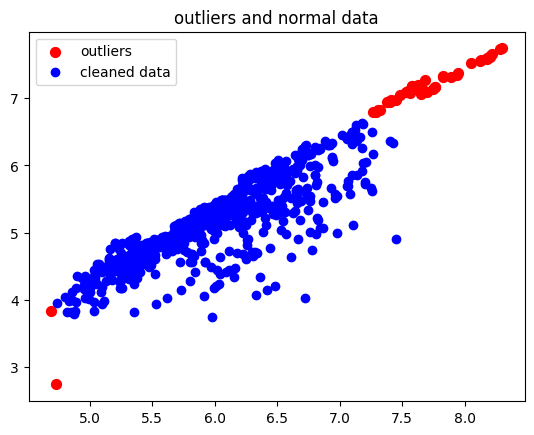

Процент выборки с z_score от изначальной:  93.27


In [448]:
data = z_score(df)
# data.shape
print("Процент выборки с z_score от изначальной: ", round(data.shape[0]/df.shape[0]*100, 2))

## Таким образом, мы избавились от 7 процентов выборки

# 3. Выполните стандартизацию независимого признака и масштабирование на интервал [-1, 1] зависимого признака. Решите задачи линейной регрессии и полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронных сетей с одним нейроном и оцените качество полученных моделей по показателю, указанному в индивидуальном задании. Отследите обучение нейронных сетей, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию.  

Независимая переменная: temp 
Зависимая переменная: temp_lower

(734, 2) (734, 2)


,temp,temp_lower
300,0.782793,0.361111
301,0.782793,0.305556
302,0.658285,0.222222
303,0.622711,0.159722
304,0.587137,0.090278


,temp,temp_lower
729,1.921154,0.881944
730,1.974515,0.930556
731,2.099023,0.993056
732,1.992302,0.979167
733,2.081236,1.000000


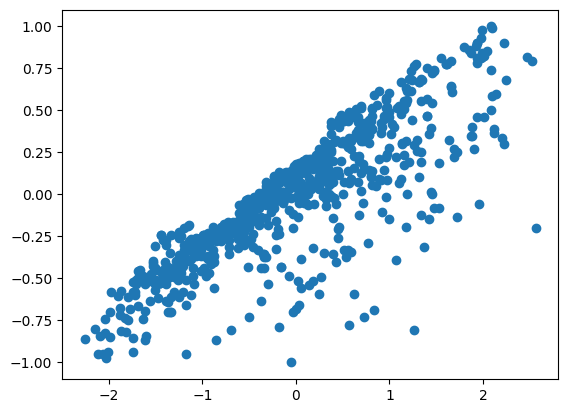

In [449]:
train_list = [(2*((data['temp_lower'] - data['temp_lower'].min())/(data['temp_lower'].max() - data['temp_lower'].min()))-1).values, ((data['temp'] - data['temp'].mean())/data['temp'].std()).values] 
# train_list = [(2*((data['temp_lower'] - data['temp_lower'].min())/(data['temp_lower'].max() - data['temp_lower'].min()))-1).values, ((data['temp'] - data['temp'].mean())/(data['temp'].max() - data['temp'].min())).values] 
ds = pd.DataFrame(columns=['temp', 'temp_lower'])
ds['temp_lower'] = train_list[0]
ds['temp'] = train_list[1]

print(train.shape, ds.shape)

train = ds
test = ds.iloc[300:500, :]

plt.scatter(train['temp'], train['temp_lower'], label='data')
display(test.head())
train.tail()

In [450]:
import tensorflow as tf

## Линейная регрессия

In [451]:
# Нормализация не требуется, так как выборка очень хорошо очищена, что видно на графике 
df_normalizer = tf.keras.layers.Normalization(axis = None)
df_normalizer.adapt(train['temp'].values)

In [452]:
lin_reg = tf.keras.Sequential([
    # df_normalizer,
    tf.keras.layers.Dense(units = 1,
                          kernel_regularizer = tf.keras.regularizers.L2(l2=0.01))
])

In [453]:
lin_reg.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.01),
    loss = 'mse',
    metrics = ['r2_score']
)

In [454]:
%%time
hist = lin_reg.fit(
    train['temp'], train['temp_lower'],
    epochs = 100,
    verbose = 1,
    validation_split = 0.4
)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 3.2319 - r2_score: -15.5275 - val_loss: 1.8089 - val_r2_score: -14.5206
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6630 - r2_score: -13.6352 - val_loss: 1.5560 - val_r2_score: -12.3597
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1616 - r2_score: -10.6579 - val_loss: 1.3271 - val_r2_score: -10.4024
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9041 - r2_score: -8.4323 - val_loss: 1.1145 - val_r2_score: -8.5820
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5059 - r2_score: -6.5282 - val_loss: 0.9233 - val_r2_score: -6.9427
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.2098 - r2_score: -5.5763 - val_loss: 0.7436 - val_r2_score: -5.4009
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9810 - r2_score: -4.3440 - val_loss: 0.5971 - val_r2_score: -4.1430
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7953 - r2_score: -3.3008 - v

In [455]:
print(hist.history.keys())

dict_keys(['loss', 'r2_score', 'val_loss', 'val_r2_score'])


In [456]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    # plt.ylim([0, max(history.history['loss'])])
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Error for sequential model')
    plt.legend()
    plt.grid(True)
    

In [457]:
def plot_metrics(history):
    plt.plot(history.history['r2_score'], label = 'r2_score')
    plt.plot(history.history['val_r2_score'], label = 'val_r2_score')
    # plt.ylim([0, max(history.history['r2_score'])*1])
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.title('R2 score for sequential model')
    plt.legend()
    plt.grid(True)

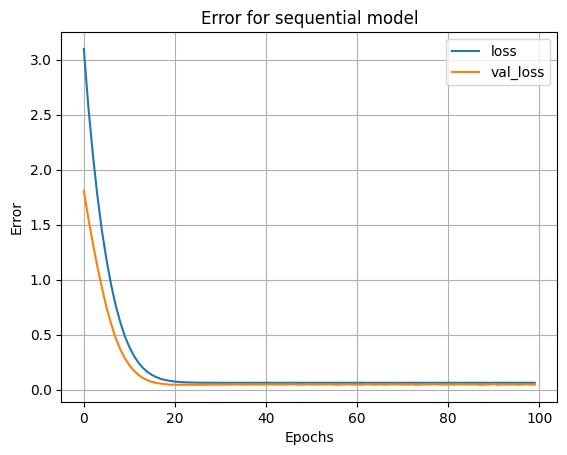

In [458]:
plot_loss(hist)

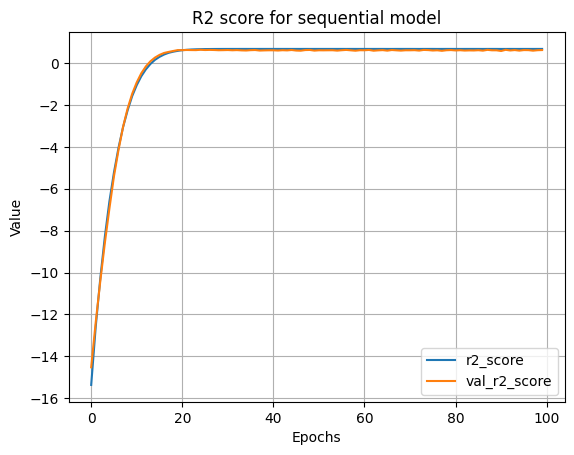

In [459]:
plot_metrics(hist)

In [460]:
def print_res(yhat):
    plt.scatter(test['temp'], test['temp_lower'], c='b', label='Data')
    plt.plot(test['temp'], yhat, c = 'r', label='prediction')
    plt.title('prediction')
    plt.legend()
    plt.grid(True)

In [461]:
y_lin = lin_reg.predict(test['temp'].values)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


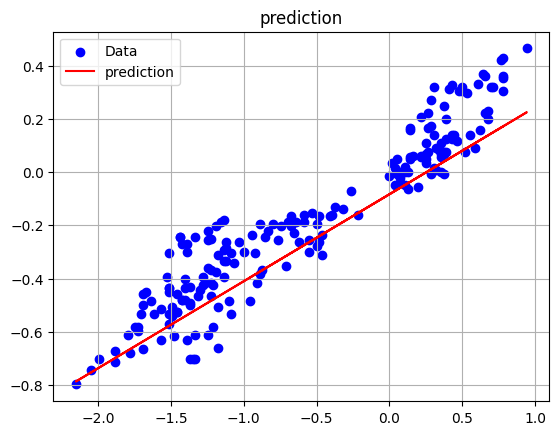

In [462]:
print_res(y_lin)

## Нелинейная регрессия

In [463]:
# tmp = train['temp'].copy()
x = np.array([train['temp'].values, train['temp'].values**2, train['temp'].values**3])
# print(x[0:5])
x = x.T
print(x[0:5])

# def preparePol():

[[0.7294323  0.53207149 0.38811013]
 [0.76500609 0.58523432 0.44770782]
 [1.45869498 2.12779105 3.10379812]
 [1.7254984  2.97734472 5.13740355]
 [1.95672803 3.82878457 7.49189008]]


In [464]:
pol_reg = tf.keras.Sequential([
    tf.keras.Input(shape=(3, )),
    tf.keras.layers.Dense(units=1,
                         kernel_regularizer = tf.keras.regularizers.L2(l2=0.01))
])

In [465]:
pol_reg.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

In [466]:
pol_reg.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mse',
    metrics=['r2_score']
)

In [467]:
%%time
phist = pol_reg.fit(
    x, train['temp_lower'],
    epochs = 100,
    verbose = 1,
    validation_split = 0.2
)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 4.6855 - r2_score: -29.5507 - val_loss: 1.7879 - val_r2_score: -11.3609
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7752 - r2_score: -16.6265 - val_loss: 0.9629 - val_r2_score: -5.6107
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2248 - r2_score: -6.6892 - val_loss: 0.6290 - val_r2_score: -3.2813
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0896 - r2_score: -5.0140 - val_loss: 0.5272 - val_r2_score: -2.5708
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6914 - r2_score: -3.5912 - val_loss: 0.5041 - val_r2_score: -2.4145
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5987 - r2_score: -2.6940 - val_loss: 0.4833 - val_r2_score: -2.2768
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5567 - r2_score: -2.6199 - val_loss: 0.4532 - val_r2_score: -2.0758
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5404 - r2_score: -2.2854 - val_l

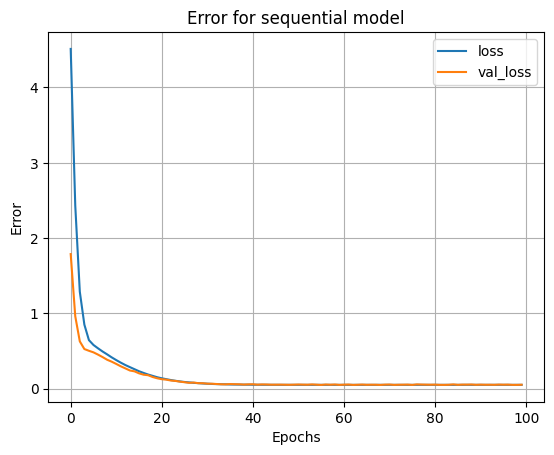

In [468]:
plot_loss(phist)

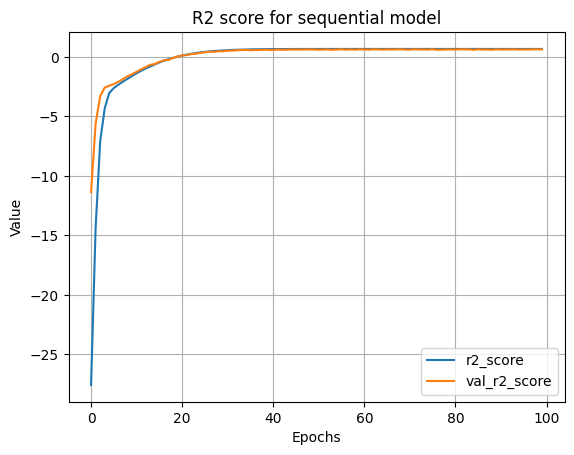

In [469]:
plot_metrics(phist)

In [470]:
x_test = np.array([test['temp'].values, test['temp'].values**2, test['temp'].values**3])
x_test = x_test.T
y_pol = pol_reg.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


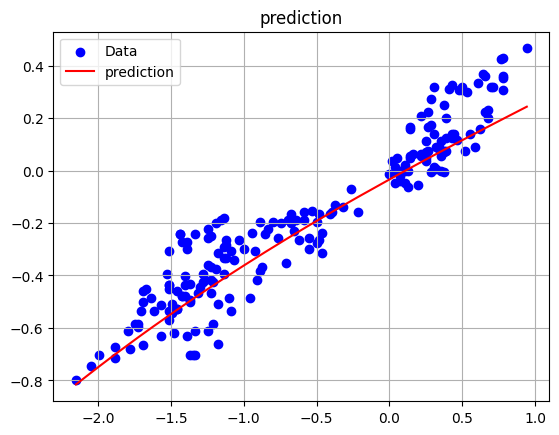

In [471]:
plt.scatter(test['temp'], test['temp_lower'], c='b', label='Data')
plt.plot(np.sort(test['temp']), y_pol[np.argsort(test['temp'])], c = 'r', label='prediction')
plt.title('prediction')
plt.legend()
plt.grid(True)

# 4. Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линии линейной и полиномиальной регрессий (другими цветами), подписывая оси и рисунок и создавая легенду

## !!!. Отдельно посмотреть оценку ошибки и обучаемости можно в третьем задании для каждой из регрессий

## 1. Оценка ошибки и обучаемости линейной регрессии

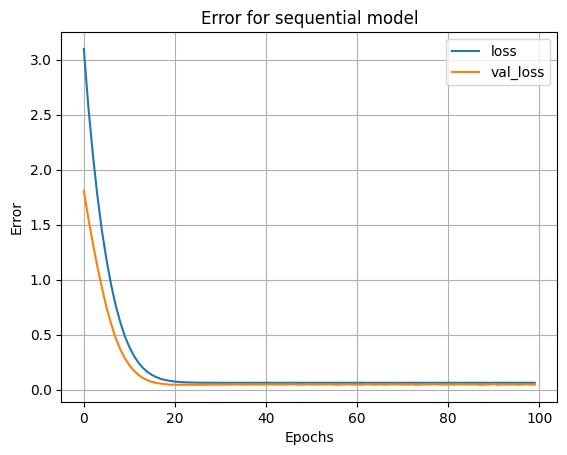

In [472]:
plot_loss(hist)

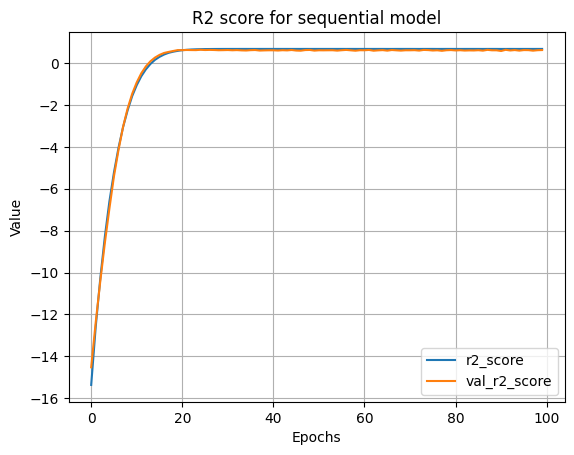

In [473]:
plot_metrics(hist)

## 2. Оценка ошибки и обучаемости полиномиальной регрессии

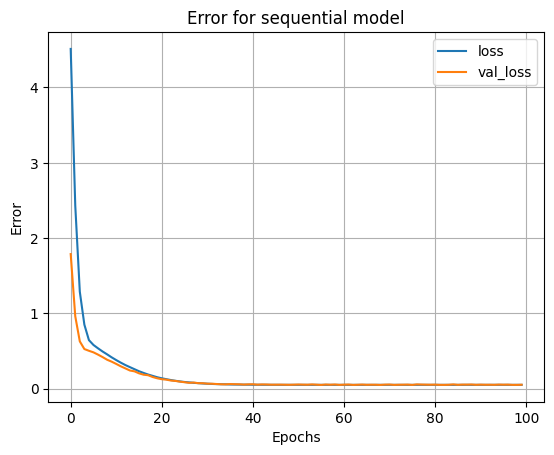

In [474]:
plot_loss(phist)

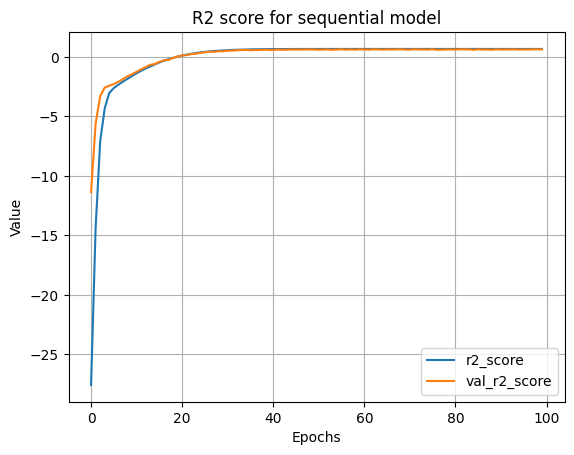

In [475]:
plot_metrics(phist)

# 5. Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линии линейной и полиномиальной регрессий (другими цветами), подписывая оси и рисунок и создавая легенду

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


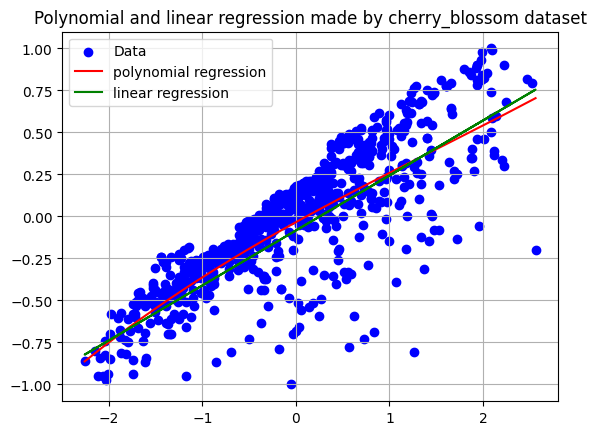

In [476]:

y_lin_test = lin_reg.predict(train['temp'].values)
y_pol_test = pol_reg.predict(x)

plt.scatter(train['temp'], train['temp_lower'], c='b', label='Data')
plt.plot(np.sort(train['temp']), y_pol_test[np.argsort(train['temp'])], c = 'r', label='polynomial regression')
plt.plot(train['temp'], y_lin_test, c = 'g', label='linear regression')

plt.title('Polynomial and linear regression made by cherry_blossom dataset')
plt.legend()
plt.grid(True)

# 6. Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании.  

Доп. признак: имеющий минимальную корреляцию с независимой переменной

In [576]:
df

,year,doy,temp,temp_upper,temp_lower
50,851,108.0,7.38,12.10,2.66
63,864,100.0,6.42,8.69,4.14
65,866,106.0,6.44,8.11,4.77
88,889,104.0,6.83,8.48,5.19
90,891,109.0,6.98,8.96,5.00
...,...,...,...,...,...
1175,1976,99.0,8.20,8.77,7.63
1176,1977,93.0,8.22,8.78,7.66
1177,1978,104.0,8.20,8.78,7.61
1178,1979,97.0,8.28,8.83,7.73


In [578]:
df.corr()['temp']

year          0.028033
doy          -0.326976
temp          1.000000
temp_upper    0.876747
temp_lower    0.858841
Name: temp, dtype: float64

In [580]:
df.corr()['temp'].min()

-0.3269757034361482

## Cледовательно, выбираем признак 'doy'

# 7. Стандартизуйте этот признак и визуализируйте его в соответствии с индивидуальным заданием.

Доп. признак: имеющий минимальную корреляцию с независимой переменной 

Визуализация доп. признака – эмпирическая плотность распределения

<Axes: ylabel='Density'>

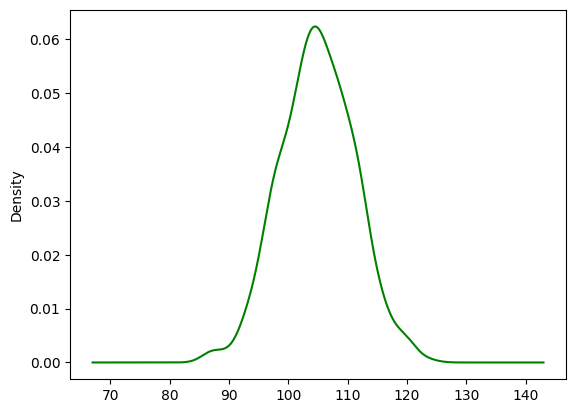

In [581]:
# plt.scatter(df['temp_lower'], df['doy'])
df.doy.plot.density(color='green')

In [582]:
# df['doy'].mean()
tmp = df.copy()
tmp.reset_index(inplace=True, drop=True)
tmp

,year,doy,temp,temp_upper,temp_lower
0,851,108.0,7.38,12.10,2.66
1,864,100.0,6.42,8.69,4.14
2,866,106.0,6.44,8.11,4.77
3,889,104.0,6.83,8.48,5.19
4,891,109.0,6.98,8.96,5.00
...,...,...,...,...,...
782,1976,99.0,8.20,8.77,7.63
783,1977,93.0,8.22,8.78,7.66
784,1978,104.0,8.20,8.78,7.61
785,1979,97.0,8.28,8.83,7.73


In [583]:
ds['doy'] = (tmp['doy'] - tmp['doy'].mean()) / tmp['doy'].std(ddof=0)
# df['doy'].std()
# ds = ds.dropna().copy()
# display(ds)
print(ds.isna().sum())
# ds

temp          0
temp_lower    0
doy           0
dtype: int64


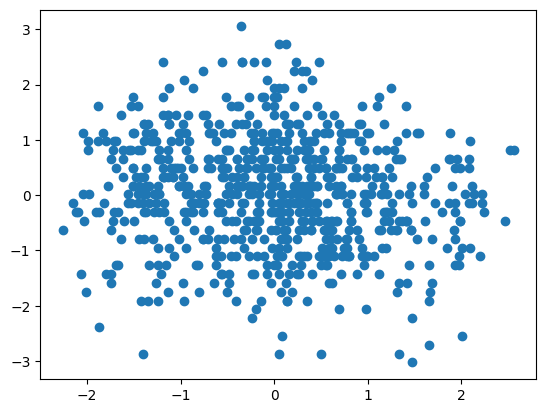

In [584]:
# ds[700:734]
plt.scatter(ds['temp'], ds['doy'])

# 8. Сформируйте набор входных данных из двух стандартизованных признаков набора данных (независимый признак и определенный признак), постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика. Отследите обучение нейронной сети, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию.  

Показатель качества регрессии – MSE (mean squared error)

Степень полинома: 3

Параметры глубокой нейронной сети: кол-во скрытых слоев – 3, кол-во нейронов в скрытом слое – 128, функция активации – сигмоида.

In [636]:
X = np.array(ds[['temp', 'doy']])
feature_normalizer = tf.keras.layers.Normalization(axis=None, input_shape=(2, ))
feature_normalizer.adapt(X)

C:\Python312\Lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [637]:
uni_model = tf.keras.Sequential([
    feature_normalizer,
    # tf.keras.Input(shape=(1, )),
    tf.keras.layers.Dense(units=128, activation='sigmoid', 
                         kernel_regularizer = tf.keras.regularizers.L2(l2=0.01)),
    tf.keras.layers.Dense(units=128, activation='sigmoid', 
                         kernel_regularizer = tf.keras.regularizers.L2(l2=0.01)),
    tf.keras.layers.Dense(units=128, activation='sigmoid',
                         kernel_regularizer = tf.keras.regularizers.L2(l2=0.01)),
    tf.keras.layers.Dense(units=1)
])

In [638]:
uni_model.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_24 (Normalization)     │ (None, 2)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,540 (131.02 KB)

 Trainable params: 33,537 (131.00 KB)

 Non-trainable params: 3 (16.00 B)

In [639]:
uni_model.compile(
    loss = 'mse',
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    metrics=['r2_score']
)

In [640]:
uhist = uni_model.fit(
    X, ds['temp_lower'],
    epochs = 100,
    verbose = 1,
    validation_split = 0.2
)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 4.1410 - r2_score: -10.7216 - val_loss: 1.9583 - val_r2_score: -0.0030
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7572 - r2_score: -0.5008 - val_loss: 0.8925 - val_r2_score: 6.4528e-04
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8044 - r2_score: -0.1798 - val_loss: 0.5105 - val_r2_score: -0.2773
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4443 - r2_score: -0.0150 - val_loss: 0.3257 - val_r2_score: -0.0938
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3026 - r2_score: -0.0509 - val_loss: 0.2594 - val_r2_score: -0.1787
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2778 - r2_score: -0.3274 - val_loss: 0.2234 - val_r2_score: -0.1691
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2143 - r2_score: -0.0309 - val_loss: 0.2631 - val_r2_score: -0.6431
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2099 - r2_score: -0.1930 - val_

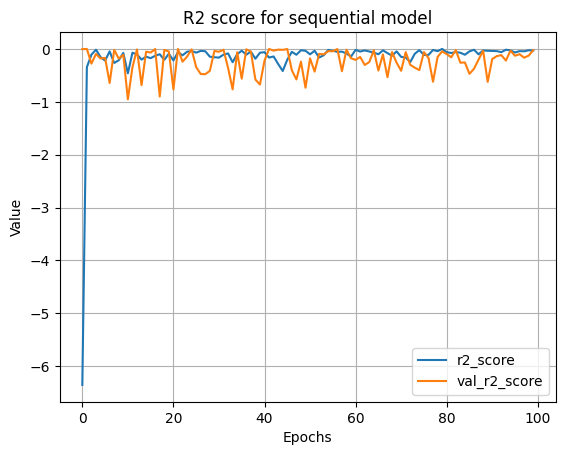

In [641]:
plot_metrics(uhist)

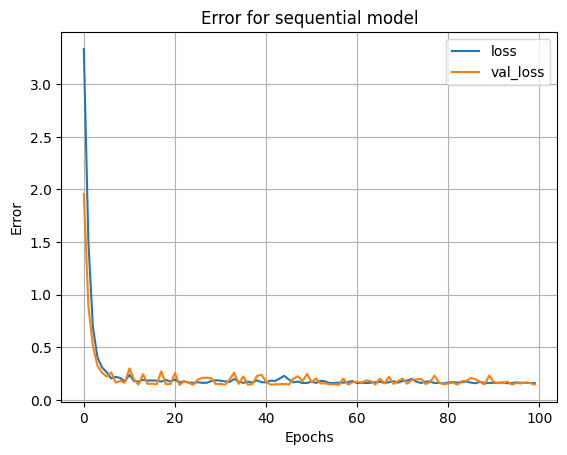

In [642]:
plot_loss(uhist)

# 9. Визуализируйте набор данных в виде диаграммы рассеяния и прогноз нейронной сети в виде поверхности в трехмерном пространстве, подписывая оси и рисунок. 

In [643]:
from matplotlib import cm

In [644]:
n_plot = 51

x_plot = np.linspace(np.min(xs), np.max(xs), n_plot)
y_plot = np.linspace(np.min(ys), np.max(ys), n_plot)
x_mesh, y_mesh = np.meshgrid(x_plot, y_plot)
x_mesh.shape, y_mesh.shape

((51, 51), (51, 51))

In [645]:
x_plot2 = np.reshape(x_mesh, [n_plot**2,1])
y_plot2 = np.reshape(y_mesh, [n_plot**2,1])
xy_2 = np.hstack([x_plot2, y_plot2])
xy_2.shape

(2601, 2)

In [684]:
z = uni_model.predict(xy_2)
z.shape
xy_2.shape

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step


(2601, 2)

In [647]:
z_mesh = z.reshape((n_plot, n_plot))
z_mesh.shape

(51, 51)

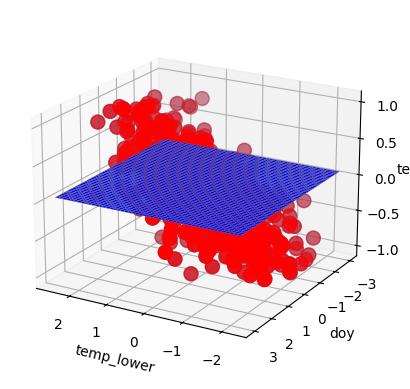

In [649]:
# plt.scatter(ds['temp'], ds['doy'])
# plt.plot(ds['temp'], y_uhat, c = 'r')
fig = plt.figure()
ax = plt.axes(projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = ds['temp_lower']

ax.scatter(xs, ys, zs, s = 100)

ax.set_xlabel('temp_lower')
ax.set_ylabel('doy')
ax.set_zlabel('temp')

ax.plot_surface(x_mesh, y_mesh, z_mesh, linewidth = 0.25, cstride=1, rstride=1,
                cmap=cm.winter, antialiased=True, edgecolors='gray')
ax.scatter( xs, ys, zs, s=100, c='r' )

ax.view_init(azim = 120, elev = 20)

## К сожалению, вывод удручающий, так как для такой диаграммы рассеяния(см. решение задания 7) метрика обучаемости R^2 всегда будет находится справа от нуля, так как модель не может найти способа предсказывать лучше графика y = m, что заметно при обучении модели(показатель R2 все время приближается к 0).


# 10. Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду. 

In [655]:
ds.shape
train = ds.iloc[:534, :]
test = ds.iloc[534: , :]


In [669]:
xy = np.array(train[['temp', 'doy']])
feature_normalizer = tf.keras.layers.Normalization(axis=None)
feature_normalizer.adapt(xy)

In [670]:
uni_model = tf.keras.Sequential([
    tf.keras.Input(shape=(2, )),
    feature_normalizer,
    tf.keras.layers.Dense(units=128, activation='sigmoid', 
                         kernel_regularizer = tf.keras.regularizers.L2(l2=0.01)),
    tf.keras.layers.Dense(units=128, activation='sigmoid', 
                         kernel_regularizer = tf.keras.regularizers.L2(l2=0.01)),
    tf.keras.layers.Dense(units=128, activation='sigmoid',
                         kernel_regularizer = tf.keras.regularizers.L2(l2=0.01)),
    tf.keras.layers.Dense(units=1)
])

In [671]:
uni_model.summary()

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_27 (Normalization)     │ (None, 2)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,540 (131.02 KB)

 Trainable params: 33,537 (131.00 KB)

 Non-trainable params: 3 (16.00 B)

In [672]:
uni_model.compile(
    loss = 'mse',
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    metrics=['r2_score']
)

In [694]:
uhist = uni_model.fit(
    xy, train['temp_lower'],
    epochs = 100,
    verbose = 1,
    validation_split = 0.2
)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1937 - r2_score: -0.0364 - val_loss: 0.1003 - val_r2_score: -0.7649
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1904 - r2_score: -0.0194 - val_loss: 0.0576 - val_r2_score: -0.0151
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2146 - r2_score: -0.0826 - val_loss: 0.0585 - val_r2_score: -0.0201
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2286 - r2_score: -0.1739 - val_loss: 0.1402 - val_r2_score: -1.3926
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2238 - r2_score: -0.1561 - val_loss: 0.1923 - val_r2_score: -2.3554
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2108 - r2_score: -0.0824 - val_loss: 0.0685 - val_r2_score: -0.1988
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2097 - r2_score: -0.0574 - val_loss: 0.0576 - val_r2_score: -0.0055
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2120 - r2_score: -0.0998 - val_loss:

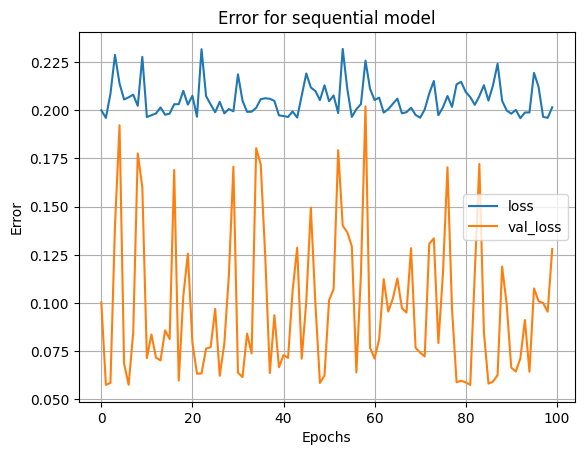

In [695]:
plot_loss(uhist)

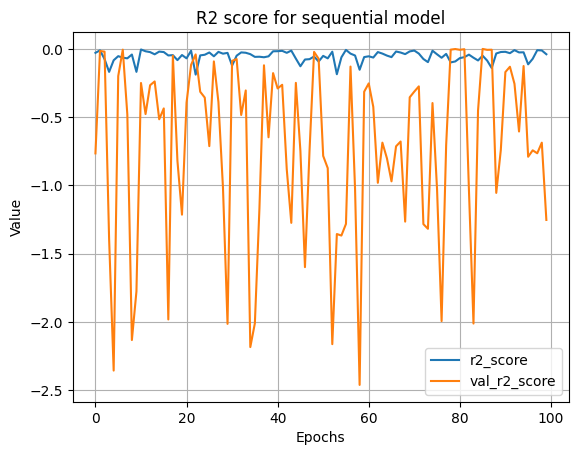

In [696]:
plot_metrics(uhist)

In [704]:
# xy_test = np.array(test[['temp', 'doy']])
# xy_test[:10]
X = np.array(test[['temp', 'doy']])
xs = X[:, 0]
ys = X[:, 1]
zs = np.array(df['temp_lower'])



In [705]:
n_plot = 51

x_plot = np.linspace(np.min(xs), np.max(xs), n_plot)
y_plot = np.linspace(np.min(ys), np.max(ys), n_plot)
x_mesh, y_mesh = np.meshgrid(x_plot, y_plot)
x_mesh.shape, y_mesh.shape

((51, 51), (51, 51))

In [ ]:
# x_mesh, y_mesh = np.meshgrid(x_plot, y_plot)
# x_mesh.shape, y_mesh.shape

In [706]:
x_plot2 = np.reshape(x_mesh, [n_plot**2,1])
y_plot2 = np.reshape(y_mesh, [n_plot**2,1])
xy_2 = np.hstack([x_plot2, y_plot2])
xy_2.shape

(2601, 2)

In [707]:
z = uni_model.predict(xy_2)

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [708]:
z_mesh = z.reshape((n_plot, n_plot))
z_mesh.shape

(51, 51)

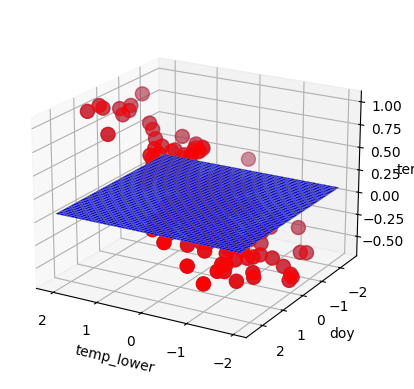

In [709]:
fig = plt.figure()
ax = plt.axes(projection='3d')

xs = xy_test[:, 0]
ys = xy_test[:, 1]
zs = test['temp_lower']

ax.scatter(xs, ys, zs, s = 100)

ax.set_xlabel('temp_lower')
ax.set_ylabel('doy')
ax.set_zlabel('temp')

ax.plot_surface(x_mesh, y_mesh, z_mesh, linewidth = 0.25, cstride=1, rstride=1,
                cmap=cm.winter, antialiased=True, edgecolors='gray')
ax.scatter( xs, ys, zs, s=100, c='r' )

ax.view_init(azim = 120, elev = 20)

## Как мы видим, ситуация не изменилась, ведь признак никак не коррелирует с остальными, что было показано в конце 9ой задачи